# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari
import pickle as pkl
from keras.models import load_model

Using TensorFlow backend.


In [2]:
RUN_ID = '929'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('camel')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

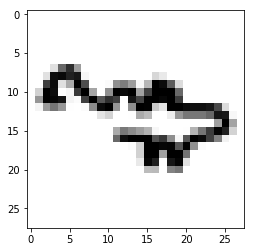

In [5]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray_r')

In [6]:
np.min(x_train[0])

-1.0

In [24]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.002
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [25]:
# gan.model = load_model(os.path.join(RUN_FOLDER, 'model.pkl'))
# gan.generator = load_model(os.path.join(RUN_FOLDER, 'generator.pkl'))
# gan.discriminator = load_model(os.path.join(RUN_FOLDER, 'discriminator.pkl'))

In [26]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_28 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_29 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 64)          0         
__________

In [27]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_13 (Batc (None, 3136)              12544     
_________________________________________________________________
activation_32 (Activation)   (None, 3136)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 14, 14, 128)       204928    
__________

## training

In [28]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [42]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

737 [D loss: (0.704)(R 0.657, F 0.751)] [D acc: (0.516)(0.500, 0.531)] [G loss: 0.725] [G acc: 0.250]
738 [D loss: (0.684)(R 0.647, F 0.721)] [D acc: (0.500)(0.547, 0.453)] [G loss: 0.707] [G acc: 0.375]
739 [D loss: (0.682)(R 0.663, F 0.701)] [D acc: (0.570)(0.594, 0.547)] [G loss: 0.731] [G acc: 0.297]
740 [D loss: (0.689)(R 0.653, F 0.724)] [D acc: (0.539)(0.594, 0.484)] [G loss: 0.747] [G acc: 0.188]
741 [D loss: (0.720)(R 0.664, F 0.775)] [D acc: (0.570)(0.625, 0.516)] [G loss: 0.750] [G acc: 0.188]
742 [D loss: (0.680)(R 0.664, F 0.697)] [D acc: (0.547)(0.500, 0.594)] [G loss: 0.754] [G acc: 0.234]
743 [D loss: (0.680)(R 0.672, F 0.688)] [D acc: (0.602)(0.625, 0.578)] [G loss: 0.731] [G acc: 0.344]
744 [D loss: (0.669)(R 0.660, F 0.677)] [D acc: (0.594)(0.594, 0.594)] [G loss: 0.720] [G acc: 0.375]
745 [D loss: (0.680)(R 0.661, F 0.699)] [D acc: (0.586)(0.609, 0.562)] [G loss: 0.721] [G acc: 0.281]
746 [D loss: (0.655)(R 0.629, F 0.681)] [D acc: (0.719)(0.750, 0.688)] [G loss: 0.

818 [D loss: (0.681)(R 0.677, F 0.686)] [D acc: (0.617)(0.562, 0.672)] [G loss: 0.738] [G acc: 0.328]
819 [D loss: (0.653)(R 0.620, F 0.686)] [D acc: (0.648)(0.734, 0.562)] [G loss: 0.750] [G acc: 0.266]
820 [D loss: (0.678)(R 0.610, F 0.746)] [D acc: (0.539)(0.609, 0.469)] [G loss: 0.724] [G acc: 0.375]
821 [D loss: (0.656)(R 0.584, F 0.727)] [D acc: (0.562)(0.719, 0.406)] [G loss: 0.771] [G acc: 0.203]
822 [D loss: (0.678)(R 0.637, F 0.720)] [D acc: (0.609)(0.688, 0.531)] [G loss: 0.742] [G acc: 0.266]
823 [D loss: (0.645)(R 0.613, F 0.678)] [D acc: (0.641)(0.641, 0.641)] [G loss: 0.742] [G acc: 0.375]
824 [D loss: (0.677)(R 0.554, F 0.800)] [D acc: (0.516)(0.672, 0.359)] [G loss: 0.715] [G acc: 0.375]
825 [D loss: (0.664)(R 0.619, F 0.709)] [D acc: (0.617)(0.594, 0.641)] [G loss: 0.736] [G acc: 0.344]
826 [D loss: (0.676)(R 0.631, F 0.722)] [D acc: (0.547)(0.594, 0.500)] [G loss: 0.736] [G acc: 0.219]
827 [D loss: (0.671)(R 0.595, F 0.747)] [D acc: (0.578)(0.688, 0.469)] [G loss: 0.

899 [D loss: (0.668)(R 0.637, F 0.699)] [D acc: (0.578)(0.609, 0.547)] [G loss: 0.771] [G acc: 0.250]
900 [D loss: (0.679)(R 0.672, F 0.687)] [D acc: (0.586)(0.531, 0.641)] [G loss: 0.726] [G acc: 0.312]
901 [D loss: (0.653)(R 0.614, F 0.692)] [D acc: (0.648)(0.656, 0.641)] [G loss: 0.778] [G acc: 0.344]
902 [D loss: (0.685)(R 0.660, F 0.709)] [D acc: (0.578)(0.578, 0.578)] [G loss: 0.765] [G acc: 0.234]
903 [D loss: (0.675)(R 0.634, F 0.716)] [D acc: (0.578)(0.531, 0.625)] [G loss: 0.736] [G acc: 0.312]
904 [D loss: (0.680)(R 0.648, F 0.712)] [D acc: (0.578)(0.500, 0.656)] [G loss: 0.722] [G acc: 0.297]
905 [D loss: (0.658)(R 0.601, F 0.716)] [D acc: (0.633)(0.719, 0.547)] [G loss: 0.711] [G acc: 0.359]
906 [D loss: (0.696)(R 0.645, F 0.747)] [D acc: (0.570)(0.547, 0.594)] [G loss: 0.734] [G acc: 0.359]
907 [D loss: (0.685)(R 0.596, F 0.774)] [D acc: (0.578)(0.672, 0.484)] [G loss: 0.756] [G acc: 0.297]
908 [D loss: (0.677)(R 0.645, F 0.709)] [D acc: (0.547)(0.578, 0.516)] [G loss: 0.

980 [D loss: (0.623)(R 0.577, F 0.669)] [D acc: (0.648)(0.703, 0.594)] [G loss: 0.781] [G acc: 0.281]
981 [D loss: (0.622)(R 0.544, F 0.699)] [D acc: (0.625)(0.656, 0.594)] [G loss: 0.793] [G acc: 0.312]
982 [D loss: (0.618)(R 0.530, F 0.707)] [D acc: (0.672)(0.766, 0.578)] [G loss: 0.824] [G acc: 0.266]
983 [D loss: (0.624)(R 0.567, F 0.680)] [D acc: (0.688)(0.703, 0.672)] [G loss: 0.840] [G acc: 0.250]
984 [D loss: (0.703)(R 0.508, F 0.897)] [D acc: (0.656)(0.797, 0.516)] [G loss: 0.790] [G acc: 0.297]
985 [D loss: (0.687)(R 0.600, F 0.774)] [D acc: (0.531)(0.625, 0.438)] [G loss: 0.790] [G acc: 0.297]
986 [D loss: (0.705)(R 0.591, F 0.819)] [D acc: (0.562)(0.625, 0.500)] [G loss: 0.795] [G acc: 0.188]
987 [D loss: (0.664)(R 0.651, F 0.677)] [D acc: (0.586)(0.578, 0.594)] [G loss: 0.770] [G acc: 0.328]
988 [D loss: (0.675)(R 0.639, F 0.712)] [D acc: (0.539)(0.578, 0.500)] [G loss: 0.792] [G acc: 0.281]
989 [D loss: (0.651)(R 0.624, F 0.678)] [D acc: (0.633)(0.578, 0.688)] [G loss: 0.

1060 [D loss: (0.658)(R 0.554, F 0.762)] [D acc: (0.641)(0.766, 0.516)] [G loss: 0.817] [G acc: 0.203]
1061 [D loss: (0.641)(R 0.645, F 0.636)] [D acc: (0.648)(0.578, 0.719)] [G loss: 0.799] [G acc: 0.266]
1062 [D loss: (0.697)(R 0.653, F 0.741)] [D acc: (0.586)(0.547, 0.625)] [G loss: 0.813] [G acc: 0.203]
1063 [D loss: (0.663)(R 0.628, F 0.699)] [D acc: (0.609)(0.609, 0.609)] [G loss: 0.800] [G acc: 0.234]
1064 [D loss: (0.641)(R 0.634, F 0.649)] [D acc: (0.672)(0.609, 0.734)] [G loss: 0.769] [G acc: 0.297]
1065 [D loss: (0.622)(R 0.560, F 0.683)] [D acc: (0.641)(0.688, 0.594)] [G loss: 0.850] [G acc: 0.188]
1066 [D loss: (0.665)(R 0.613, F 0.717)] [D acc: (0.562)(0.578, 0.547)] [G loss: 0.816] [G acc: 0.219]
1067 [D loss: (0.655)(R 0.591, F 0.718)] [D acc: (0.641)(0.672, 0.609)] [G loss: 0.825] [G acc: 0.250]
1068 [D loss: (0.661)(R 0.621, F 0.701)] [D acc: (0.688)(0.672, 0.703)] [G loss: 0.847] [G acc: 0.203]
1069 [D loss: (0.672)(R 0.659, F 0.684)] [D acc: (0.562)(0.500, 0.625)] [

1140 [D loss: (0.637)(R 0.620, F 0.654)] [D acc: (0.617)(0.531, 0.703)] [G loss: 0.828] [G acc: 0.188]
1141 [D loss: (0.597)(R 0.524, F 0.669)] [D acc: (0.734)(0.719, 0.750)] [G loss: 0.814] [G acc: 0.250]
1142 [D loss: (0.684)(R 0.579, F 0.789)] [D acc: (0.625)(0.672, 0.578)] [G loss: 0.810] [G acc: 0.281]
1143 [D loss: (0.647)(R 0.562, F 0.731)] [D acc: (0.617)(0.688, 0.547)] [G loss: 0.779] [G acc: 0.297]
1144 [D loss: (0.691)(R 0.642, F 0.740)] [D acc: (0.523)(0.547, 0.500)] [G loss: 0.772] [G acc: 0.266]
1145 [D loss: (0.643)(R 0.586, F 0.700)] [D acc: (0.609)(0.641, 0.578)] [G loss: 0.822] [G acc: 0.203]
1146 [D loss: (0.638)(R 0.561, F 0.715)] [D acc: (0.680)(0.672, 0.688)] [G loss: 0.804] [G acc: 0.234]
1147 [D loss: (0.685)(R 0.582, F 0.788)] [D acc: (0.609)(0.625, 0.594)] [G loss: 0.854] [G acc: 0.141]
1148 [D loss: (0.689)(R 0.634, F 0.744)] [D acc: (0.586)(0.609, 0.562)] [G loss: 0.829] [G acc: 0.219]
1149 [D loss: (0.645)(R 0.645, F 0.645)] [D acc: (0.641)(0.578, 0.703)] [

1220 [D loss: (0.729)(R 0.668, F 0.791)] [D acc: (0.539)(0.531, 0.547)] [G loss: 0.854] [G acc: 0.172]
1221 [D loss: (0.655)(R 0.622, F 0.688)] [D acc: (0.609)(0.578, 0.641)] [G loss: 0.801] [G acc: 0.219]
1222 [D loss: (0.646)(R 0.643, F 0.649)] [D acc: (0.656)(0.609, 0.703)] [G loss: 0.860] [G acc: 0.219]
1223 [D loss: (0.658)(R 0.618, F 0.698)] [D acc: (0.609)(0.625, 0.594)] [G loss: 0.834] [G acc: 0.250]
1224 [D loss: (0.641)(R 0.556, F 0.725)] [D acc: (0.609)(0.594, 0.625)] [G loss: 0.849] [G acc: 0.172]
1225 [D loss: (0.638)(R 0.613, F 0.663)] [D acc: (0.633)(0.594, 0.672)] [G loss: 0.803] [G acc: 0.219]
1226 [D loss: (0.673)(R 0.605, F 0.741)] [D acc: (0.578)(0.578, 0.578)] [G loss: 0.818] [G acc: 0.250]
1227 [D loss: (0.688)(R 0.683, F 0.693)] [D acc: (0.570)(0.547, 0.594)] [G loss: 0.791] [G acc: 0.312]
1228 [D loss: (0.646)(R 0.646, F 0.646)] [D acc: (0.656)(0.641, 0.672)] [G loss: 0.816] [G acc: 0.250]
1229 [D loss: (0.649)(R 0.593, F 0.705)] [D acc: (0.594)(0.656, 0.531)] [

1300 [D loss: (0.661)(R 0.685, F 0.636)] [D acc: (0.633)(0.500, 0.766)] [G loss: 0.922] [G acc: 0.125]
1301 [D loss: (0.647)(R 0.678, F 0.616)] [D acc: (0.633)(0.500, 0.766)] [G loss: 0.901] [G acc: 0.156]
1302 [D loss: (0.637)(R 0.671, F 0.603)] [D acc: (0.633)(0.500, 0.766)] [G loss: 0.795] [G acc: 0.297]
1303 [D loss: (0.657)(R 0.581, F 0.732)] [D acc: (0.617)(0.641, 0.594)] [G loss: 0.871] [G acc: 0.156]
1304 [D loss: (0.628)(R 0.591, F 0.664)] [D acc: (0.680)(0.656, 0.703)] [G loss: 0.883] [G acc: 0.234]
1305 [D loss: (0.661)(R 0.596, F 0.727)] [D acc: (0.602)(0.641, 0.562)] [G loss: 0.874] [G acc: 0.234]
1306 [D loss: (0.660)(R 0.668, F 0.652)] [D acc: (0.609)(0.531, 0.688)] [G loss: 0.892] [G acc: 0.141]
1307 [D loss: (0.645)(R 0.620, F 0.671)] [D acc: (0.664)(0.625, 0.703)] [G loss: 0.876] [G acc: 0.125]
1308 [D loss: (0.639)(R 0.633, F 0.645)] [D acc: (0.672)(0.594, 0.750)] [G loss: 0.895] [G acc: 0.156]
1309 [D loss: (0.666)(R 0.565, F 0.767)] [D acc: (0.641)(0.672, 0.609)] [

KeyboardInterrupt: 

In [ ]:


check = True
while check :
    
    for _ in range(5):

        valid = np.ones((BATCH_SIZE,1))
        fake = np.zeros((BATCH_SIZE,1))

        idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
        true_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
        gen_imgs = gan.generator.predict(noise)

        d_loss_real, d_acc_real =   gan.discriminator.train_on_batch(true_imgs, valid)
        d_loss_fake, d_acc_fake =   gan.discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        d_acc = 0.5 * (d_acc_real + d_acc_fake)


    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)] [D acc: (%.3f)(%.3f, %.3f)]" % (d_loss, d_loss_real, d_loss_fake, d_acc, d_acc_real, d_acc_real))  
    

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss, g_acc = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.3f] [G acc: %.3f]" % (g_loss, g_acc))
    
   

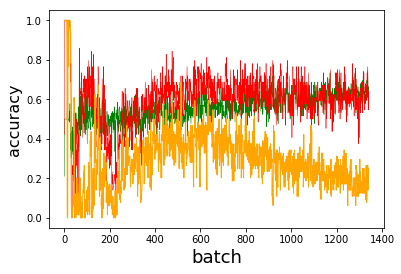

In [44]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[4] for x in gan.d_losses], color='red', linewidth=0.5)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=1)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

# plt.xlim(0, 2000)

plt.show()

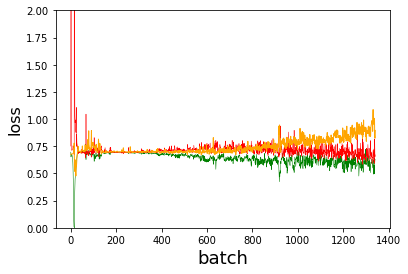

In [43]:
fig = plt.figure()
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=1)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()
